## Using a Markov Process to learn numpy - eigenvectors

The following explores a population flow between two populations.
A concrete example would be people moving from one city to another,
but could also be an infectious process, ie moving between being a
human and zombie via bite or healing.

This exploration begins as a mathematics initiate and programmer
novice, learning or relearning calculus then linear algebra
concepts and techniques to determine the equilibrium values for
the population.

The following articles were instrumental in this learning:
1. https://medium.com/@andrew.chamberlain/using-eigenvectors-to-find-steady-state-population-flows-cd938f124764
2. http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.linalg.eig.html
3. https://nicolewhite.github.io/2014/06/10/steady-state-transition-matrix.html

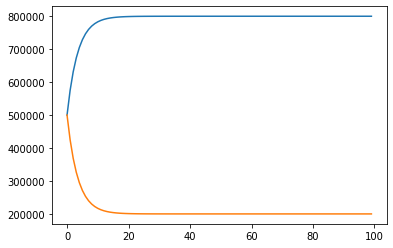

In [209]:
# use OOP/FP and a bit of "intuition" via visualization

h = 500000.0
dz = 0.05

z = 500000.0
dh = 0.20

def generation_f(h, z, dz, dh):
    z_dh = z * dh
    h_dz = h * dz
    return (h + z_dh - h_dz), (z + h_dz - z_dh), dz, dh

class GenerationVisitor:
    def __init__(self, h, z, dz, dh, generation_f):
        self._h = h
        self._z = z
        self._dz = dz
        self._dh = dh
        self._generation = -1
        self._generation_f = generation_f
        
    def __next__(self):
        self._generation += 1
        if self._generation == 0:
            return self._h, self._z
        self._h, self._z, self._dz, self._dh = self._generation_f(self._h, self._z, self._dz, self._dh)
        return self._h, self._z
    
import matplotlib.pyplot as plt

v = GenerationVisitor(h, z, dz, dh, generation_f)

xs = range(0, 100)
ys = [v.__next__() for _ in xs]

plt.plot(xs, ys)
plt.show()

In [208]:
# converge via dot product, each dot is a step
# rather than use "intuition", use calculus,
# identifying convergence when delta < epsilon.

pop = np.array([500000.0, 500000.0])
p = np.array([[0.95, 0.05],
              [0.20, 0.80]])
epm = p
steps = 0
for _ in range(1, 100):
    steps += 1
    if (epm[0] - epm[1])[0] < 0.1e-20:
        break
    epm = np.dot(epm, epm)

ssr = epm[0]
ssr * sum(pop)

array([800000.01490116, 200000.00372529])

In [301]:
# test the np procedure against a known case
# https://nicolewhite.github.io/2014/06/10/steady-state-transition-matrix.html
p = np.array([[0.4,0.4,0.2],
             [0.0,0.5,0.5],
             [0.1,0.3,0.6]])

_w, v = np.linalg.eig(p.T)
f = v.T[0]
f / sum(f)

array([0.0877193 +0.j, 0.38596491+0.j, 0.52631579+0.j])

In [300]:
import numpy as np

population = np.array([500000.0, 500000.0])
population_shift = np.array([[0.95, 0.05],
                             [0.20, 0.80]])

_eigenvalues, eigenvectors = np.linalg.eig(population_shift.T)
f = eigenvectors.T[0]
equilibrium = f / sum(f)

pop = np.copy(population)
pop.fill(sum(population))
pop * equilibrium

array([800000., 200000.])